In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/CVD_cleaned.csv")

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


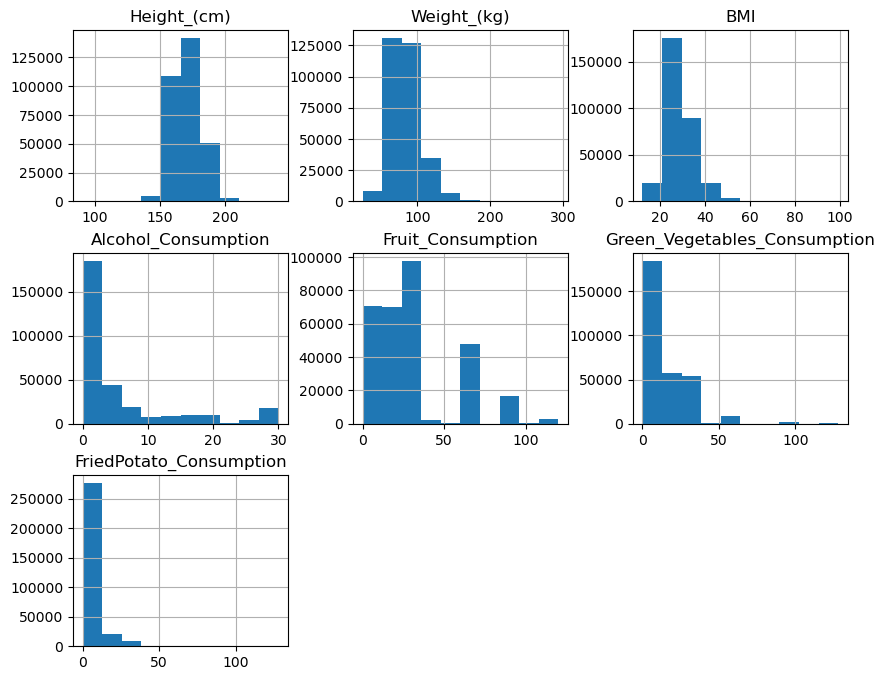

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

df.hist(figsize=(10,8))
plt.show()

<Axes: >

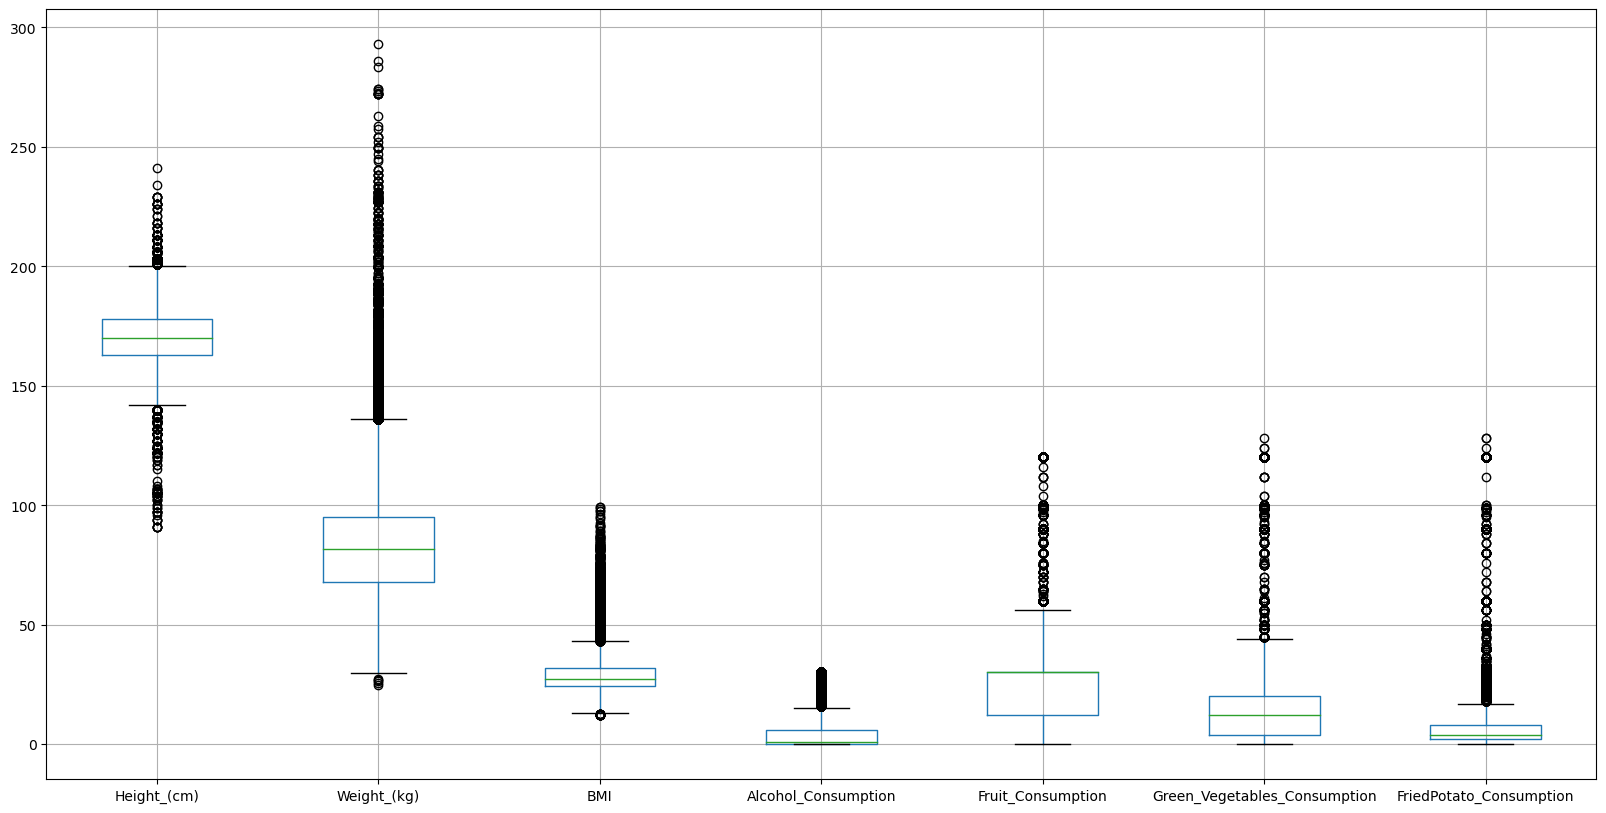

In [6]:
df.boxplot(figsize=(20,10))

In [7]:
# df1 = pd.DataFrame(df[['Height_(cm)']])
# df1.head()

In [8]:
df['z_height'] = (df['Height_(cm)'] - df['Height_(cm)'].mean())/ df['Height_(cm)'].std()

In [9]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,z_height
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,-1.934246
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,-0.526856
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,-0.714508
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,0.880534
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,1.912620


In [10]:
df = df[(df['z_height'] > -3) & (df['z_height'] < 3) ]
df = df.drop(['z_height'],axis=1)

## Outlier Weight 

In [11]:
df['z_w'] = (df['Weight_(kg)'] - df['Weight_(kg)'].mean())/ df['Weight_(kg)'].std()

In [12]:
df = df[(df['z_w'] > -3) & (df['z_w'] < 3) ]
df = df.drop(['z_w'],axis=1)

## Outlier BMI

In [13]:
df['z_bmi'] = (df['BMI'] - df['BMI'].mean())/ df['BMI'].std()

In [14]:
df = df[(df['z_bmi'] > -3) & (df['z_bmi'] < 3) ]
df = df.drop(['z_bmi'],axis=1)

In [15]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000
mean,170.630301,82.267725,28.156775,5.155024,29.918344,15.177324,6.270760
std,10.440207,19.110037,5.618524,8.239394,24.886540,14.947080,8.558784
min,140.000000,26.310000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.140000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,80.740000,27.410000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,93.440000,31.460000,6.000000,30.000000,20.000000,8.000000
max,201.000000,147.420000,46.410000,30.000000,120.000000,128.000000,128.000000


<Axes: >

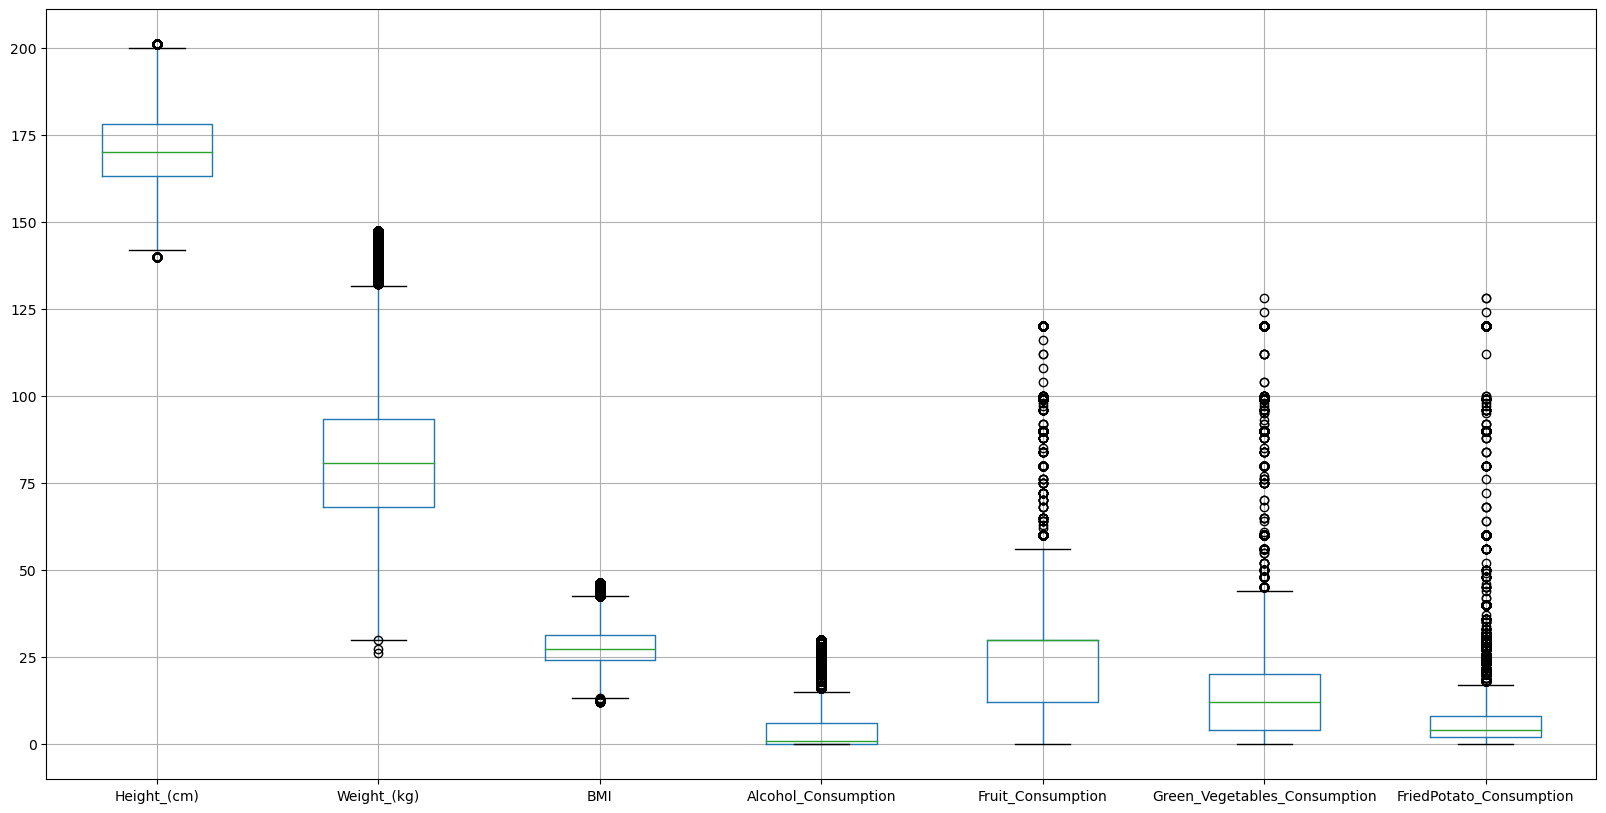

In [16]:
df.boxplot(figsize=(20,10))

In [17]:
alcohol = { 
    'no alcohol' : 0, # i == 0
    'once a week' : 1, # i > 0 & i < 5
    'twice a week' : 2, # i > 5 & i < 10
    '3 - 4 times in a week' : 3, # i > 10 & i < 20
    'daily' : 4  # i >20
}



In [18]:
df['Alcohol_Consumption'].loc[(df['Alcohol_Consumption'] == 0)] = 0
df['Alcohol_Consumption'].loc[(df['Alcohol_Consumption'] > 0) & (df['Alcohol_Consumption'] <= 5) ] = 1
df['Alcohol_Consumption'].loc[(df['Alcohol_Consumption'] > 5) & (df['Alcohol_Consumption'] <= 10) ] = 2
df['Alcohol_Consumption'].loc[(df['Alcohol_Consumption'] > 10) & (df['Alcohol_Consumption'] <= 20) ] = 3
df['Alcohol_Consumption'].loc[(df['Alcohol_Consumption'] > 20)] = 4

In [19]:
df['Alcohol_Consumption'].value_counts()

0.0    136171
1.0     87273
3.0     28592
2.0     27288
4.0     22700
Name: Alcohol_Consumption, dtype: int64

In [20]:
fruits = { 
    'not at all' : 0, # i == 0
    'one day' : 1, # i > 0 & i <= 30
    '1-2 per day' : 2, # i > 30 & i <= 60
    '2-3 per day' : 3, # i > 60  & i <= 90
    'more than 3-4 per day' : 4  # i > 90 
}

green_veg = {
    'not at all' : 0, # i == 0
    'one day' : 1, # i > 0 & i <= 30
    '1-2 per day' : 2, # i > 30 & i <= 60
    '2-3 per day' : 3, # i > 60  & i <= 90
    'more than 3-4 per day' : 4  # i > 90 
}

fried_potato = {
    'not at all' : 0, # i == 0
    'one day' : 1, # i > 0 & i <= 30
    '1-2 per day' : 2, # i > 30 & i <= 60
    '2-3 per day' : 3, # i > 60  & i <= 90
    'more than 3-4 per day' : 4  # i > 90 
}

In [21]:
# # fruits
df['Fruit_Consumption'].loc[(df['Fruit_Consumption'] == 0)] = 0
df['Fruit_Consumption'].loc[(df['Fruit_Consumption'] > 0) & (df['Fruit_Consumption'] <= 30) ] = 1
df['Fruit_Consumption'].loc[(df['Fruit_Consumption'] > 30) & (df['Fruit_Consumption'] <= 60) ] = 2
df['Fruit_Consumption'].loc[(df['Fruit_Consumption'] > 60) & (df['Fruit_Consumption'] <= 90) ] = 3
df['Fruit_Consumption'].loc[(df['Fruit_Consumption'] > 90)] = 4

#green_veg
df['Green_Vegetables_Consumption'].loc[(df['Green_Vegetables_Consumption'] == 0)] = 0
df['Green_Vegetables_Consumption'].loc[(df['Green_Vegetables_Consumption'] > 0) & (df['Green_Vegetables_Consumption'] <= 30) ] = 1
df['Green_Vegetables_Consumption'].loc[(df['Green_Vegetables_Consumption'] > 30) & (df['Green_Vegetables_Consumption'] <= 60) ] = 2
df['Green_Vegetables_Consumption'].loc[(df['Green_Vegetables_Consumption'] > 60) & (df['Green_Vegetables_Consumption'] <= 90) ] = 3
df['Green_Vegetables_Consumption'].loc[(df['Green_Vegetables_Consumption'] > 90)] = 4

# #fried_potato
df['FriedPotato_Consumption'].loc[(df['FriedPotato_Consumption'] == 0)] = 0
df['FriedPotato_Consumption'].loc[(df['FriedPotato_Consumption'] > 0) & (df['FriedPotato_Consumption'] <= 30) ] = 1
df['FriedPotato_Consumption'].loc[(df['FriedPotato_Consumption'] > 30) & (df['FriedPotato_Consumption'] <= 60) ] = 2
df['FriedPotato_Consumption'].loc[(df['FriedPotato_Consumption'] > 60) & (df['FriedPotato_Consumption'] <= 90) ] = 3
df['FriedPotato_Consumption'].loc[(df['FriedPotato_Consumption'] > 90)] = 4

In [22]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000,302024.000000
mean,170.630301,82.267725,28.156775,1.054304,1.280981,0.986051,0.866885
std,10.440207,19.110037,5.618524,1.262290,0.655633,0.390918,0.380331
min,140.000000,26.310000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.140000,0.000000,1.000000,1.000000,1.000000
50%,170.000000,80.740000,27.410000,1.000000,1.000000,1.000000,1.000000
75%,178.000000,93.440000,31.460000,2.000000,1.000000,1.000000,1.000000
max,201.000000,147.420000,46.410000,4.000000,4.000000,4.000000,4.000000


In [23]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,1.0,1.0,1.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,1.0,0.0,1.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,1.0,1.0,1.0,1.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,1.0,1.0,1.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,1.0,1.0,0.0


In [24]:
df['General_Health'].value_counts()

Very Good    109293
Good          92731
Excellent     55613
Fair          33826
Poor          10561
Name: General_Health, dtype: int64

In [25]:
df['Checkup'].value_counts()

Within the past year       233818
Within the past 2 years     36537
Within the past 5 years     17114
5 or more years ago         13181
Never                        1374
Name: Checkup, dtype: int64

In [26]:
df['Exercise'].value_counts()

Yes    235526
No      66498
Name: Exercise, dtype: int64

In [27]:
df['Age_Category'].value_counts()

65-69    32806
60-64    31688
70-74    30704
55-59    27296
50-54    24312
80+      22153
40-44    20892
75-79    20523
45-49    20259
35-39    19951
18-24    18410
30-34    17935
25-29    15095
Name: Age_Category, dtype: int64

In [28]:
age = {}
a = df['Age_Category'].value_counts()
age = a.to_dict()

print(age)

{'65-69': 32806, '60-64': 31688, '70-74': 30704, '55-59': 27296, '50-54': 24312, '80+': 22153, '40-44': 20892, '75-79': 20523, '45-49': 20259, '35-39': 19951, '18-24': 18410, '30-34': 17935, '25-29': 15095}


In [29]:
type(alcohol)

dict

In [30]:
df['Exercise'].value_counts()

Yes    235526
No      66498
Name: Exercise, dtype: int64

In [31]:
df['Diabetes'].value_counts()

No                                            254726
Yes                                            38147
No, pre-diabetes or borderline diabetes         6580
Yes, but female told only during pregnancy      2571
Name: Diabetes, dtype: int64

## Column Mapping

In [32]:
binary_column = ['Exercise','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History','Heart_Disease']

for column in binary_column:
    df[column] = df[column].map({'No':0 , 'Yes':1})

In [33]:
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}

df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

In [34]:
general_health_mapping = {
    'Poor' : 0, 
    'Fair' : 1, 
    'Good' : 2, 
    'Very Good' : 3, 
    'Excellent' : 4
}

df['General_Health'] = df['General_Health'].map(general_health_mapping)

In [35]:
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
}

df['Checkup'] = df['Checkup'].map(checkup_mapping)

In [36]:
age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)

In [37]:
df = pd.get_dummies(df,columns=['Sex'])

In [38]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,3,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,1.0,1.0,1.0,1,0
1,3,4,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,1.0,0.0,1.0,1,0
2,3,4,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,1.0,1.0,1.0,1.0,1,0
3,0,4,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,1.0,1.0,1.0,0,1
4,2,4,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,1.0,1.0,0.0,0,1


In [39]:
df['Fruit_Consumption'].value_counts()

1.0    224050
2.0     50168
3.0     16435
0.0      8072
4.0      3299
Name: Fruit_Consumption, dtype: int64

In [ ]:
#from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , LabelEncoder

In [ ]:
# le = LabelEncoder()
# ohe = OneHotEncoder(drop= 'first',sparse= False)

In [ ]:
# df['Exercise'] = le.fit_transform(df['Exercise'])
# df['Skin_Cancer'] = le.fit_transform(df['Skin_Cancer'])
# df['Other_Cancer'] = le.fit_transform(df['Other_Cancer'])
# df['Depression'] = le.fit_transform(df['Depression'])
# df['Diabetes'] = le.fit_transform(df['Diabetes'])
# df['Arthritis'] = le.fit_transform(df['Arthritis'])
# df['Smoking_History'] = le.fit_transform(df['Smoking_History'])
# df['d_sex'] = pd.get_dummies(df.Sex)
# df['General_Health'] = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']]).fit_transform(df[['General_Health']])
# df['Checkup'] = OrdinalEncoder(categories=[['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year']]).fit_transform(df[['Checkup']])
# df['Age_Category'] = OrdinalEncoder(categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']]).fit_transform(df[['Age_Category']])
# df['Heart_Disease'] = df['Heart_Disease'].apply(lambda x:1 if x == 'Yes' else 0)

In [ ]:
# df.head()

In [ ]:
# ct = ColumnTransformer(transformers=[
#     ('t1', OneHotEncoder(sparse=False, drop='first'), ['Exercise','Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History','Sex']),
#     ('t2', OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']]), ['General_Health']),
#     ('t3', OrdinalEncoder(categories=[['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year']]), ['Checkup']),
#     ('t4', OrdinalEncoder(categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']]), ['Age_Category']),
# ], remainder='passthrough')

In [41]:
#df.to_csv('model_data.csv',index= False)